In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [12]:
daten = pd.read_hdf('../data/data.hdf5', key='Daten')
daten.shape
daten.head()

,HitMultiplicityValues.n_hit_doms,HitMultiplicityValues.n_hit_doms_one_pulse,HitMultiplicityValues.n_hit_strings,HitStatisticsValues.cog_x,HitStatisticsValues.cog_y,HitStatisticsValues.cog_z,HitStatisticsValues.cog_z_sigma,HitStatisticsValues.max_pulse_time,HitStatisticsValues.min_pulse_time,HitStatisticsValues.q_max_doms,...,SplineMPETruncatedEnergy_SPICEMie_AllDOMS_Muon.fit_status,SplineMPETruncatedEnergy_SPICEMie_AllDOMS_Muon.length,SplineMPETruncatedEnergy_SPICEMie_AllDOMS_Muon.time,SplineMPETruncatedEnergy_SPICEMie_AllDOMS_Muon.type,SplineMPETruncatedEnergy_SPICEMie_AllDOMS_Muon.x,SplineMPETruncatedEnergy_SPICEMie_AllDOMS_Muon.y,SplineMPETruncatedEnergy_SPICEMie_AllDOMS_Muon.z,SplineMPETruncatedEnergy_SPICEMie_AllDOMS_Muon.zenith,label,type
0,20.0,17.0,5.0,-279.361450,244.773937,198.620320,127.360420,12943.896484,9796.218750,4.272294,...,0.0,-5000.0,10629.254802,0.0,-272.333611,252.073883,259.282484,1.949657,0.0,0
1,11.0,9.0,4.0,-109.870563,474.501753,76.173641,34.356011,11562.126953,10687.387695,11.823948,...,0.0,-5000.0,10607.891231,0.0,-125.484635,496.520477,80.429334,1.933458,0.0,0
2,12.0,7.0,4.0,322.487150,-367.964946,457.894243,26.703646,11123.472656,9471.517578,4.590300,...,0.0,-5000.0,10005.703266,0.0,357.350777,-375.275106,466.207052,1.600963,0.0,0
3,14.0,9.0,5.0,169.734674,-36.608782,448.635514,33.153076,11696.294922,9487.511719,4.315884,...,0.0,-5000.0,10213.413811,0.0,153.192370,-48.507434,463.092327,1.511925,0.0,0
4,17.0,14.0,4.0,468.425204,-97.821468,-391.470533,71.946895,11803.718750,9884.652344,3.214488,...,0.0,-5000.0,9904.173218,0.0,474.978272,-69.599368,-392.356414,2.317513,0.0,0


**Daten zu features (x) und Targetvektor (y) aufteilen**


In [3]:
x = daten.iloc[:,:daten.shape[1]-3]
y = daten['type'].values


Da die Features auf unterschiedlichen Skalen sind, müssen sie skaliert werden

In [4]:
# Noch andere Skaler ausprobieren...
scaler = StandardScaler()
x = scaler.fit_transform(x)

**Definition der verschiedenen Featureanzahlen k** <br>
Danach werden alle Schritte für jedes k durch geführt. Deshalb ist um alles eine while-Schlife rum, die alle k-Werte durchläuft

In [5]:
k = np.arange(20, 150, 10)

**Forward Selection mit SelectKBest** <br>
Scorefunction ist standartisiert der T-Wert

In [6]:
x_sel = []
for i in k:
    sel = SelectKBest(k=i) 
    x_sel.append(sel.fit_transform(x, y))
    

/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 16  17  18  20  31  33  35  44  45  47  60  62  64  72  73  74  76  88
  92  95 103 105 107 115 116 117 119 156 157 159 168 169 171 179 180 182] are constant.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 16  17  18  20  31  33  35  44  45  47  60  62  64  72  73  74  76  88
  92  95 103 105 107 115 116 117 119 156 157 159 168 169 171 179 180 182] are constant.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/univariate_select

**Außerdem Teilen in Trainings- und Testdatensatz**

In [7]:
x_train = []
y_train = []
x_test = []
y_test = []

i = 0
while i < len(k):
    train_x, test_x, train_y, test_y = train_test_split(x_sel[i],y, test_size = 0.3, random_state = 42, stratify = y)
    x_train.append(train_x)
    y_train.append(train_y)
    x_test.append(test_x)
    y_test.append(test_y)
    i = i+1
    

**Random-Forest-Lerner**

In [8]:
RF = RandomForestClassifier(100)

y_pred_RF = [] #Vorhergesagten Klassen
accuracy_RF = [] #Reinheit
efficiency_RF = [] #Effizienz
jaccard_RF = [] #Jaccard-Index
roc_auc_RF = [] #Fläche unter ROC-Kurve

In [9]:
i = 0

while i < len(k):   
    #Lerner
    RF.fit(x_train[i], y_train[i])
    predict = RF.predict(x_test[i])
    y_pred_RF.append(predict)
    
    #Berechnung und speichern der Qualitätsparameter
    accuracy_RF.append(accuracy_score(y_test[i], y_pred_RF[i]))
    efficiency_RF.append(precision_score(y_test[i], y_pred_RF[i]))
    jaccard_RF.append(jaccard_similarity_score(y_test[i], y_pred_RF[i], normalize = True))
    roc_auc_RF.append(roc_auc_score(y_test[i], y_pred_RF[i]))
    
    i = i+1

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary a

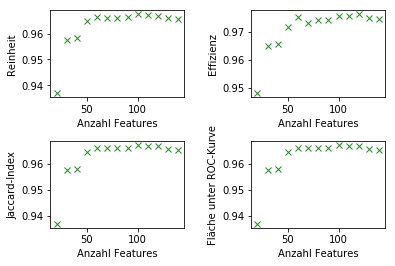

In [10]:
plt.subplot(2,2,1)
plt.plot(k, accuracy_RF, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Reinheit')

plt.subplot(2,2,2)
plt.plot(k, efficiency_RF, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Effizienz')

plt.subplot(2,2,3)
plt.plot(k, jaccard_RF, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Jaccard-Index')

plt.subplot(2,2,4)
plt.plot(k, roc_auc_RF, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Fläche unter ROC-Kurve')

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.savefig('RF_featurezahl.pdf')

Das selbe für verschiedene Baumtiefen

In [11]:
tiefe = np.arange(10,100,10)

y_pred_RF_anzahl = [] #Vorhergesagten Klassen
accuracy_RF_anzahl = [] #Reinheit
efficiency_RF_anzahl = [] #Effizienz
jaccard_RF_anzahl = [] #Jaccard-Index
roc_auc_RF_anzahl = [] #Fläche unter ROC-Kurve

i = 0
while i < len(tiefe):
    RF = RandomForestClassifier(tiefe[i])
    RF.fit(x_train[3], y_train[3])
    predict = RF.predict(x_test[3])
    y_pred_RF_anzahl.append(predict)
    
    #Berechnung und speichern der Qualitätsparameter
    accuracy_RF_anzahl.append(accuracy_score(y_test[3], y_pred_RF_anzahl[i]))
    efficiency_RF_anzahl.append(precision_score(y_test[3], y_pred_RF_anzahl[i]))
    jaccard_RF_anzahl.append(jaccard_similarity_score(y_test[3], y_pred_RF_anzahl[i], normalize = True))
    roc_auc_RF_anzahl.append(roc_auc_score(y_test[3], y_pred_RF_anzahl[i]))
    
    i = i+1

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary a

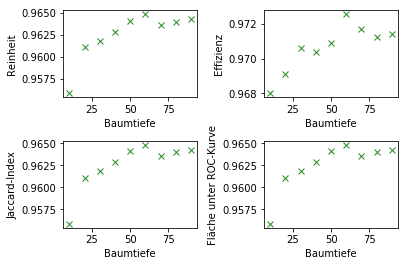

In [13]:
plt.subplot(2,2,1)
plt.plot(tiefe, accuracy_RF_anzahl, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Baumtiefe')
plt.ylabel(r'Reinheit')

plt.subplot(2,2,2)
plt.plot(tiefe, efficiency_RF_anzahl, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Baumtiefe')
plt.ylabel(r'Effizienz')

plt.subplot(2,2,3)
plt.plot(tiefe, jaccard_RF_anzahl, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Baumtiefe')
plt.ylabel(r'Jaccard-Index')

plt.subplot(2,2,4)
plt.plot(tiefe, roc_auc_RF_anzahl, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Baumtiefe')
plt.ylabel(r'Fläche unter ROC-Kurve')

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.savefig('RF_baumtiefe.pdf')

In [14]:
tiefe_best = 70 #entspricht tiefe[6]
k_best_RF = 40 #entspricht k[3]

Cross-Validation für den besten Fall <br>
Um Rechenzeit zu sparen und weil die verschiedenen Baumtiefen kaum Unterschied machen, wird allerdings tiefe = 10 benutzt...


In [15]:
RF = RandomForestClassifier(10)
print('Random-Forest:')

#Der Funktion werden die nicht gesplitteten (wird ja in der Funktion gemacht) aber selektierten (ausgewählte Features) Daten übergeben
#Funktion gibt Standartscore des Lerners zurück -> hier: Accuracy
accuracy_RF_cross = cross_val_score(RF, x_sel[3], y, cv = 5)
print('Reinheit:')
print(accuracy_RF_cross)
print(np.mean(accuracy_RF_cross), 'pm', (np.std(accuracy_RF_cross, ddof=1) / np.sqrt(len(accuracy_RF_cross))))

#Für andere Parameter: Änderung durch scoring
efficiency_RF_cross = cross_val_score(RF, x_sel[3], y, cv = 5, scoring = 'precision')
print('Effizienz:')
print(efficiency_RF_cross)
print(np.mean(efficiency_RF_cross), 'pm', (np.std(efficiency_RF_cross, ddof=1) / np.sqrt(len(efficiency_RF_cross))))

AUC_RF_cross = cross_val_score(RF, x_sel[3], y, cv = 5, scoring = 'roc_auc')
print('Fläche unter ROC-Kurve:')
print(AUC_RF_cross)
print(np.mean(AUC_RF_cross), 'pm', (np.std(AUC_RF_cross, ddof=1) / np.sqrt(len(AUC_RF_cross))))

Random-Forest:
Reinheit:
[0.916375 0.957375 0.961    0.962125 0.959375]
0.9512499999999999 pm 0.008755355503918717
Effizienz:
[0.88961646 0.97111168 0.98532879 0.98598625 0.98703361]
0.9638153595915069 pm 0.018777880153198524
Fläche unter ROC-Kurve:
[0.97598772 0.98974834 0.99142513 0.99147809 0.99220041]
0.9881679375000001 pm 0.0030715030664333325


Confusion-Matrix für besten Fall


In [16]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

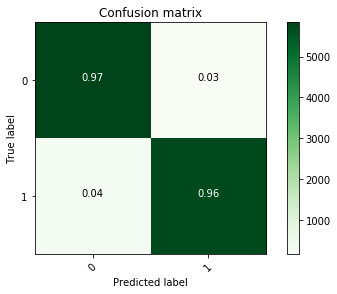

In [17]:
confusion_mtx_RF = confusion_matrix(y_test[3], y_pred_RF[3])
plot_confusion_matrix(confusion_mtx_RF, classes = range(2), cmap = plt.cm.Greens)
plt.savefig('RF_confusion.pdf')

**kNN-Klassifikator**

In [18]:
kNN = KNeighborsClassifier(10)

y_pred_kNN = [] #Vorhergesagten Klassen
accuracy_kNN = [] #Reinheit
efficiency_kNN = [] #Effizienz
jaccard_kNN = [] #Jaccard-Index
roc_auc_kNN = [] #Fläche unter ROC-Kurve

In [19]:
i = 0

while i < len(k):   
    #Lerner
    kNN.fit(x_train[i], y_train[i])
    predict = kNN.predict(x_test[i])
    y_pred_kNN.append(predict)
    
    #Berechnung und speichern der Qualitätsparameter
    accuracy_kNN.append(accuracy_score(y_test[i], y_pred_kNN[i]))
    efficiency_kNN.append(precision_score(y_test[i], y_pred_kNN[i]))
    jaccard_kNN.append(jaccard_similarity_score(y_test[i], y_pred_kNN[i], normalize = True))
    roc_auc_kNN.append(roc_auc_score(y_test[i], y_pred_kNN[i]))
    
    i = i+1

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary a

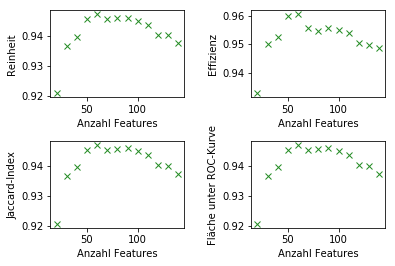

In [20]:
plt.subplot(2,2,1)
plt.plot(k, accuracy_kNN, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Reinheit')

plt.subplot(2,2,2)
plt.plot(k, efficiency_kNN, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Effizienz')

plt.subplot(2,2,3)
plt.plot(k, jaccard_kNN, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Jaccard-Index')

plt.subplot(2,2,4)
plt.plot(k, roc_auc_kNN, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Fläche unter ROC-Kurve')

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.savefig('kNN_featurezahl.pdf')

Das selbe für verschiedene Anzahl an Nachbarn

In [21]:
nachbarn = np.arange(10,100,10)

y_pred_kNN_anzahl = [] #Vorhergesagten Klassen
accuracy_kNN_anzahl = [] #Reinheit
efficiency_kNN_anzahl = [] #Effizienz
jaccard_kNN_anzahl = [] #Jaccard-Index
roc_auc_kNN_anzahl = [] #Fläche unter ROC-Kurve

i = 0
while i < len(nachbarn):
    kNN = KNeighborsClassifier(nachbarn[i])
    kNN.fit(x_train[4], y_train[4])
    predict = kNN.predict(x_test[4])
    y_pred_kNN_anzahl.append(predict)
    
    #Berechnung und speichern der Qualitätsparameter
    accuracy_kNN_anzahl.append(accuracy_score(y_test[4], y_pred_kNN_anzahl[i]))
    efficiency_kNN_anzahl.append(precision_score(y_test[4], y_pred_kNN_anzahl[i]))
    jaccard_kNN_anzahl.append(jaccard_similarity_score(y_test[4], y_pred_kNN_anzahl[i], normalize = True))
    roc_auc_kNN_anzahl.append(roc_auc_score(y_test[4], y_pred_kNN_anzahl[i]))
    
    i = i+1

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary a

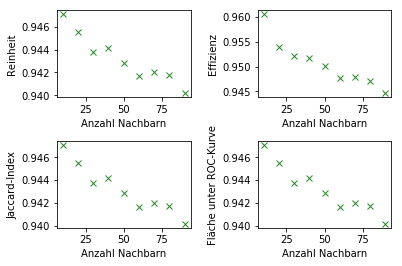

In [22]:
plt.subplot(2,2,1)
plt.plot(nachbarn, accuracy_kNN_anzahl, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Nachbarn')
plt.ylabel(r'Reinheit')

plt.subplot(2,2,2)
plt.plot(nachbarn, efficiency_kNN_anzahl, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Nachbarn')
plt.ylabel(r'Effizienz')

plt.subplot(2,2,3)
plt.plot(nachbarn, jaccard_kNN_anzahl, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Nachbarn')
plt.ylabel(r'Jaccard-Index')

plt.subplot(2,2,4)
plt.plot(nachbarn, roc_auc_kNN_anzahl, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Nachbarn')
plt.ylabel(r'Fläche unter ROC-Kurve')

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.savefig('kNN_nachbarzahl.pdf')

In [23]:
nachbar_best = 10
k_best_kNN = 50

Cross-Validation

In [24]:
kNN = KNeighborsClassifier(10)
print('kNN-Klassifikator:')

#Der Funktion werden die nicht gesplitteten (wird ja in der Funktion gemacht) aber selektierten (ausgewählte Features) Daten übergeben
#Funktion gibt Standartscore des Lerners zurück -> hier: Accuracy
accuracy_kNN_cross = cross_val_score(kNN, x_sel[4], y, cv = 5)
print('Reinheit:')
print(accuracy_kNN_cross)
print(np.mean(accuracy_kNN_cross), 'pm', (np.std(accuracy_kNN_cross, ddof=1) / np.sqrt(len(accuracy_kNN_cross))))

#Für andere Parameter: Änderung durch scoring
efficiency_kNN_cross = cross_val_score(kNN, x_sel[4], y, cv = 5, scoring = 'precision')
print('Effizienz:')
print(efficiency_kNN_cross)
print(np.mean(efficiency_kNN_cross), 'pm', (np.std(efficiency_kNN_cross, ddof=1) / np.sqrt(len(efficiency_kNN_cross))))

AUC_kNN_cross = cross_val_score(kNN, x_sel[4], y, cv = 5, scoring = 'roc_auc')
print('Fläche unter ROC-Kurve:')
print(AUC_kNN_cross)
print(np.mean(AUC_kNN_cross), 'pm', (np.std(AUC_kNN_cross, ddof=1) / np.sqrt(len(AUC_kNN_cross))))

kNN-Klassifikator:
Reinheit:
[0.886375 0.944875 0.952875 0.952    0.952875]
0.9378 pm 0.012943603632682819
Effizienz:
[0.85374228 0.95804376 0.97633447 0.97679325 0.97859974]
0.9487026981385844 pm 0.024032440799445106
Fläche unter ROC-Kurve:
[0.96076325 0.98541272 0.98752938 0.98664166 0.98830653]
0.9817307062499999 pm 0.005263909674620046


Confusion-Matrix

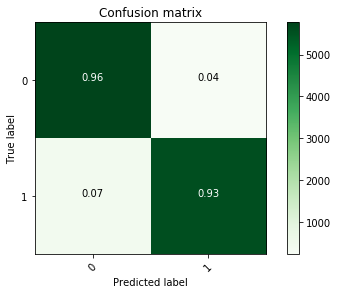

In [25]:
confusion_mtx_kNN = confusion_matrix(y_test[4], y_pred_kNN[4])
plot_confusion_matrix(confusion_mtx_kNN, classes = range(2), cmap = plt.cm.Greens)
plt.savefig('kNN_confusion.pdf')

**Naive-Bayes-Lerner**

In [26]:
NB = GaussianNB()

y_pred_NB = [] #Vorhergesagten Klassen
accuracy_NB = [] #Reinheit
efficiency_NB = [] #Effizienz
jaccard_NB = [] #Jaccard-Index
roc_auc_NB = [] #Fläche unter ROC-Kurve

In [27]:
i = 0

while i < len(k):   
    #Lerner
    NB.fit(x_train[i], y_train[i])
    predict = NB.predict(x_test[i])
    y_pred_NB.append(predict)
    
    #Berechnung und speichern der Qualitätsparameter
    accuracy_NB.append(accuracy_score(y_test[i], y_pred_NB[i]))
    efficiency_NB.append(precision_score(y_test[i], y_pred_NB[i]))
    jaccard_NB.append(jaccard_similarity_score(y_test[i], y_pred_NB[i], normalize = True))
    roc_auc_NB.append(roc_auc_score(y_test[i], y_pred_NB[i]))
    
    i = i+1

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary a

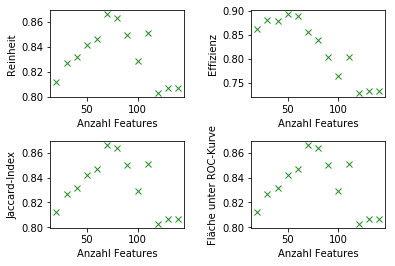

In [28]:
plt.subplot(2,2,1)
plt.plot(k, accuracy_NB, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Reinheit')

plt.subplot(2,2,2)
plt.plot(k, efficiency_NB, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Effizienz')

plt.subplot(2,2,3)
plt.plot(k, jaccard_NB, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Jaccard-Index')

plt.subplot(2,2,4)
plt.plot(k, roc_auc_NB, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Fläche unter ROC-Kurve')

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.savefig('NB_featurezahl.pdf')

In [29]:
k_best_NB = 60

Cross-Validation

In [128]:
NB = GaussianNB()
print('Naive-Bayes-Lerner:')

#Der Funktion werden die nicht gesplitteten (wird ja in der Funktion gemacht) aber selektierten (ausgewählte Features) Daten übergeben
#Funktion gibt Standartscore des Lerners zurück -> hier: Accuracy
accuracy_NB_cross = cross_val_score(NB, x_sel[5], y, cv = 5)
print('Reinheit:')
print(accuracy_NB_cross)
print(np.mean(accuracy_NB_cross), 'pm', (np.std(accuracy_NB_cross, ddof=1) / np.sqrt(len(accuracy_NB_cross))))

#Für andere Parameter: Änderung durch scoring
efficiency_NB_cross = cross_val_score(NB, x_sel[5], y, cv = 5, scoring = 'precision')
print('Effizienz:')
print(efficiency_NB_cross)
print(np.mean(efficiency_NB_cross), 'pm', (np.std(efficiency_NB_cross, ddof=1) / np.sqrt(len(efficiency_NB_cross))))

AUC_NB_cross = cross_val_score(NB, x_sel[5], y, cv = 5, scoring = 'roc_auc')
print('Fläche unter ROC-Kurve:')
print(AUC_NB_cross)
print(np.mean(AUC_NB_cross), 'pm', (np.std(AUC_NB_cross, ddof=1) / np.sqrt(len(AUC_NB_cross))))

Naive-Bayes-Lerner:
Reinheit:
[0.805125 0.795375 0.867125 0.86075  0.869875]
0.83965 pm 0.0162263481720318
Effizienz:
[0.76400606 0.72014161 0.85548293 0.8442271  0.8668485 ]
0.8101412391623096 pm 0.02886331371329807
Fläche unter ROC-Kurve:
[0.86190409 0.92239472 0.93798562 0.93526922 0.93891528]
0.9192937875 pm 0.01465058861115689


Confusion-Matrix

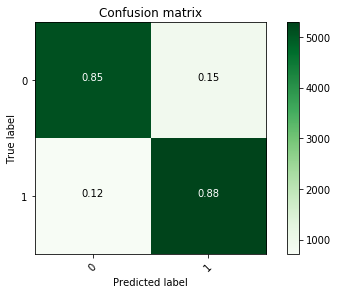

In [129]:
confusion_mtx_NB = confusion_matrix(y_test[5], y_pred_NB[5])
plot_confusion_matrix(confusion_mtx_NB, classes = range(2), cmap = plt.cm.Greens)
plt.savefig('NB_confusion.pdf')

**Zusammenfassende ROC-Kurve für alle besten Lerner**

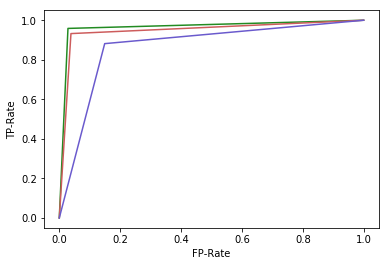

In [130]:
roc_x_RF, roc_y_RF, _ = roc_curve(y_test[3], y_pred_RF[3], pos_label=1)
plt.plot(roc_x_RF, roc_y_RF, color = 'forestgreen', label = 'Random-Forest')

roc_x_kNN, roc_y_kNN, _ = roc_curve(y_test[4], y_pred_kNN[4], pos_label=1)
plt.plot(roc_x_kNN, roc_y_kNN, color = 'indianred', label = 'kNN')

roc_x_NB, roc_y_NB, _ = roc_curve(y_test[5], y_pred_NB[5], pos_label=1)
plt.plot(roc_x_NB, roc_y_NB, color = 'slateblue', label = 'Naive-Bayes')

plt.xlabel(r'FP-Rate')
plt.ylabel(r'TP-Rate')
plt.savefig('roc_kurve.pdf')